# I. Decision Tree
* 의사결정나무(Decision tree)는 __분류__<sup>classification</sup>와 __회귀__<sup>regression</sup> 두 가지 다 적용 가능함
* __분류 트리(Classification tree)__ 는 출력 결과로 입력 데이터가 분류되는 클래스를 출력
* __회귀 트리(Regression tree)__ 는 출력 결과로 특정 의미를 지니는 실수 값을 출력 (ex. 주택의 가격 등)
* scikit-learn에는 [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) 와 [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) 에 구현되어 있음

In [10]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn

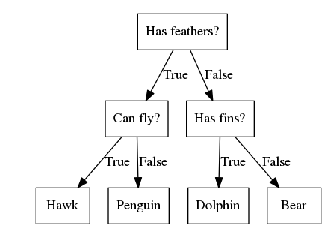

In [11]:
mglearn.plots.plot_animal_tree()

## 1) Decision tree 만들기
* mglearn이 제공하는 *two_moons* 데이터셋을 이용하여 __Regression tree__ 구현

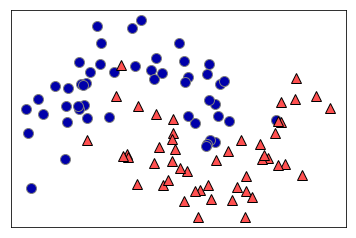

In [12]:
mglearn.plots.plot_tree_progressive()

## 2) Decision tree의 복잡도 제어하기
* 일반적으로 Tree의 깊이가 깊어질 수록 다른 말로 Leaf node가 *pure node* 가 될 때까지 진행하면 모델은 매우 복잡해지고, Training set에 **overfitting** 됨
* overfitting을 방지하기 위해 트리 생성을 조기에 중단하는 __pre-prunning__ 방법과 트리를 만든 후 노드를 삭제해 나가는 __post-prunning__(또는 그냥 prunning) 방법이 있음
* __pre-prunning__의 경우에는 트리의 최대 깊이나 리프(leaf)의 최대 개수를 제한
* scikit-learn은 __pre-prunning__ 방법만 지원함

In [14]:
# 유방암 데이터 셋을 이용하여 pre-prunning으로 제어
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


#### maxt_depth=4 로 트리 깊이 제한

In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## 3) Decision tree 분석
* scikit-learn에서 tree 모듈의 __export_graphviz__ 함수를 이용하여 트리를 시각화 할 수 있음
* `export_graphviz` 함수는 그래프 저장용 텍스트 파일 포맷인 *.dot* 파일을 생성
* **graphviz** 모듈을 이용하여 *.dot* 파일을 읽어 시각화 `pip install graphviz`

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [17]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 4) Tree 특성(feature)의 중요도
* scikit-learn에서는 feature의 중요도(importance)를 `feature_importances_` 로 제공해줌
* [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)에서 확인할 수 있듯이 *Gini index*(지니 계수)를 계산
$$ G.I(A)=\sum _{ i=1 }^{ d }{ { \left( { R }_{ i }\left( 1-\sum _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 } }  \right)  \right)  } } $$ 

In [18]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.01
  0.048  0.     0.     0.002  0.     0.     0.     0.     0.     0.727
  0.046  0.     0.     0.014  0.     0.018  0.122  0.012  0.   ]


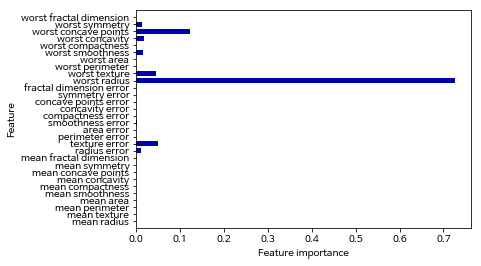

In [19]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# II. RandomForest
* Decision Tree의 단점인 Training set에 __Overfitting__ 되는 문제를 해결하기 위한 방법
* __RandomForest__ 는 기본적으로 조금씩 다른 여러 decision tree의 묶음임
* __RandomForest__ 는 여러개의 *Decision tree* 를 생성하여 그 결과를 평균냄으로써 모델의 예측을 수행하는 알고리즘

## 1) scikit-learn의 RandomForest(Classifier, Regressor)
* [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 을 이용하여 *RandomForest* 모델을 생성할 때 트리의 개수를 **`n_estimators`** 매개변수를 통해 정할 수 있음 (`default=10`)
* Tree를 생성하기 위해 **bootstrap sample** 을 생성함(scikit-learn 에서는 `bootstrap=True`)
* scikit-learn > RandomForest의 **Feature** 선택은 `max_features` 매개변수로 조정할 수있음 (`default="auto"` 이며, __sqrt(n_features)__ 값이다.)
* 생성된 Tree는 `estimator_` 라는 Attribute에 저장됨

## 2) RandomForest Example

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import numpy as np

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

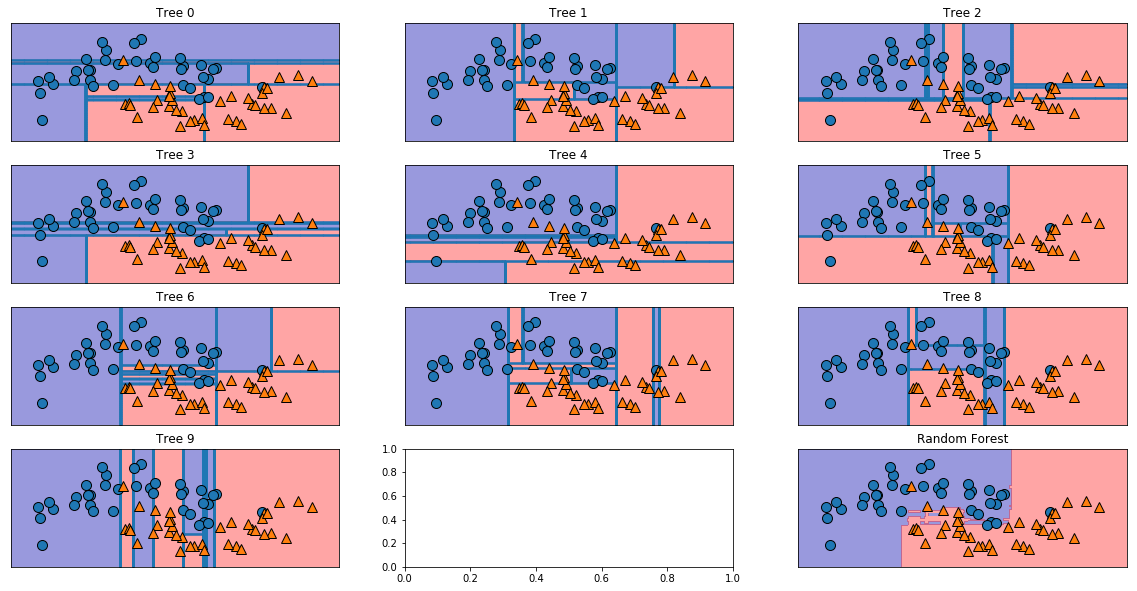

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

## 3) 위스콘신 유방암 데이터셋으로 RandomForest 적용

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set : {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.972


## 4) RandomForest의 Feature importance 
* RandomForest도 특성 중요도( __feature importance__ )를 제공하는데, 각 트기의 특성 중요도를 취합하여 계산함

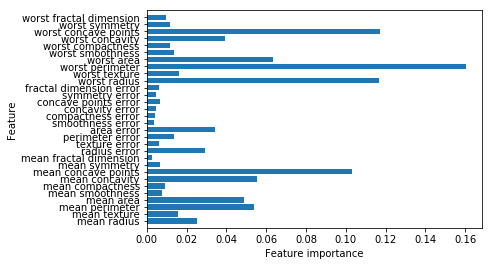

In [25]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

# III. Gradient Boosting Tree
* RandomForest 기법과는 달리 **Gradient Boosting Tree** 는 이전 Tree의 오차<sup>error</sup> 를 보완하는 방식으로 순차적으로 Tree를 생성함
* Gradient Boosting Tree는 랜덤하게 생성되지 않음(non-randomness)
* 따라서, 강한 __Pre-Prunning__ (사전 가지치기)를 사용
* 보통 1 ~ 5 정도 깊이(depth)의 Tree를 생성하므로 메모리를 적게 사용하고 예측 또한 빠름
* Gradient Boosting Tree의 기본 아이디어는 1 ~ 5 정도 깊이의 얕은 Tree를 많이 연결하여 Tree 모델의 성능을 높임
* Gradient Boosting Tree에서 중요한 파라미터(매개변수)는 이전 tree의 오차<sup>error</sup> 를 얼만큼 수정할 것인지 정해주는 **learning_rate**가 있음

## 1) scikit-learn의 GradientBoosting(Classifier, Regressor


### Parameters
* __loss__ : 손실함수(loss function)을 선택할 수 있는 매개변수이며 **default는 deviance(= logistic regression)** 이다. {‘deviance’, ‘exponential’}, optional (default=’deviance’) 
* **learning_rate** : 이전 tree의 오차<sup>error</sup> 를 얼만큼 수정할 것인지 정해주는 매개변수이며, **default=0.1** 이다. float, optional (default=0.1) learning_rate와 n_estimators는 *Trade-off* 관계이다. 즉, learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 n_estimator의 값이 커야한다.
* **n_estimators** : Boosting 횟수를 결정하며, **default=100** 이다.
* **max_depth** : Gradient Boosting Tree의 깊이(depth)를 정해주는 변수이며, **default=3** 이다.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

## max_depth = 3 (default), learning_rate = 0.1 (default)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set:0.958


In [35]:
## max_depth = 1, learning_rate = 0.1 (default)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [37]:
## max_depth = 3 (default), learning_rate = 0.01
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


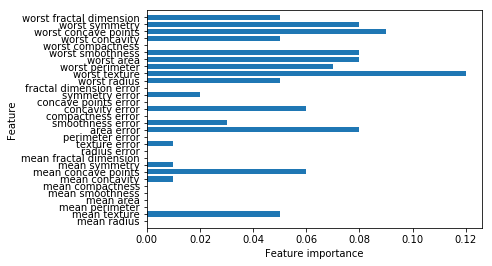

In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)